# Test Data Trend Analysis

## Installation of Needed Libraries

In [ ]:
!pip install pandasql
!pip install plotly.express as px

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import pandas as pd
from pandasql import sqldf
import plotly.express as px

## Patient Information Dataframes

### Data Processing

In [ ]:
#Patient Identifier	Age at Diagnosis	Sex	Patient's Vital Status	Overall Survival Status	Overall Survival (Months)	OS Months (Additonal Data)	Patient Tumor Grade
#Identifier to uniquely specify a patient.	Age at Diagnosis	Sex	The survival state of the person.	Overall patient survival status.	Overall survival in months since initial diagonosis.	OS Months (Additonal Data)	Patient Tumor Grade
#STRING	NUMBER	STRING	STRING	STRING	NUMBER	NUMBER	STRING
#1	1	1	1	9	1	1	1

clinicalPatientDF = pd.read_csv("Moffitt_Test_Data/data_clinical_patient.txt",delimiter="\t", header = 4)

In [ ]:
clinicalPatientDF

,PATIENT_ID,AGE_AT_DIAGNOSIS,SEX,VITAL_STATUS,OS_STATUS,OS_MONTHS,OS_MONTHS_ADDITIONAL,PATIENT_GRADE
0,P-0000119,67,Female,Deceased,1:DECEASED,27.37,NaN,Mod_Diff
1,P-0000241,49,Female,Deceased,1:DECEASED,24.00,NaN,Mod-Poorly-Diff
2,P-0000493,24,Male,Deceased,1:DECEASED,23.87,NaN,NaN
3,P-0000511,39,Female,Deceased,1:DECEASED,23.27,NaN,Poorly-Diff
4,P-0000520,64,Male,Living,0:LIVING,41.50,NaN,Mod-Poorly-Diff
...,...,...,...,...,...,...,...,...
1094,P-0014252,59,Male,Living,0:LIVING,55.37,NaN,Mod_Diff
1095,P-0014258,69,Male,Deceased,1:DECEASED,9.97,NaN,Mod-Poorly-Diff
1096,P-0014296,46,Female,Living,0:LIVING,12.07,NaN,NaN
1097,P-0014404,62,Female,Living,0:LIVING,NaN,28.23,Poorly-Diff


In [ ]:
#Patient Identifier	Sample Identifier	Chemo Exposure of sequenced specimen	Tumor Sample Histology	MSI Status	Oncotree Code	Sample Type	Primary Tumor Site	Metastatic Biopsy Site	Primary Tumor Location	Gene Panel	Stage At Diagnosis	Molecular Subtype	MSI Score	mCRC Type	Specimen Type	Metastasectomy	Metastasectomy Site	TIme to Metastasis Months	Time from Met Dx to Sequencing	First Site of Metastasis	Metastases Site First: Liver	Metastases Site First: Ln	Metastases Site First: Lung	Metastases Site First: Pelvis	Metastases Site First: Brain	Metastases Site First: Bone	Metastases Site First: Peritoneum, omentum, abdomen	Metastases Site First: Gynecological	Other Metastasis Sites	Cancer Type	Cancer Type Detailed	Somatic Status	TMB (nonsynonymous)
#Identifier to uniquely specify a patient.	A unique sample identifier.	Chemo Exposure of sequenced specimen	Tumor Sample Histology	MSI status.	Oncotree Code	The type of sample (i.e., normal, primary, met, recurrence).	Text term to describe the organ sub-division in an individual with cancer.	Metastatic Biopsy Site	Primary Tumor Location	Gene panel.	Stage At Diagnosis	Molecular subtype.	MSI Score	mCRC Type	The broad cancer phenotype and site information values for a sample to be processed.	Metastasectomy	Metastasectomy Site	TIme to Metastasis Months	Time from Met Dx to Sequencing	First Site of Metastasis	Metastases Site First: Liver	Metastases Site First: Ln	Metastases Site First: Lung	Metastases Site First: Pelvis	Metastases Site First: Brain	Metastases Site First: Bone	Metastases Site First: Peritoneum, omentum, abdomen	Metastases Site First: Gynecological	Other Metastasis Sites Description	Cancer Type	Cancer Type Detailed	Somatic Status	TMB (nonsynonymous)
#STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	NUMBER	STRING	STRING	STRING	STRING	NUMBER	NUMBER	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	NUMBER
#1	1	1	1	1	1	9	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1

clinicalSampleDF = pd.read_csv("Moffitt_Test_Data/data_clinical_sample.txt",delimiter="\t", header = 4)

In [ ]:
clinicalSampleDF

,PATIENT_ID,SAMPLE_ID,CHEMO_EXP_SEQ_SPECIMEN,TUMOR_SAMPLE_HISTOLOGY,MSI_STATUS,ONCOTREE_CODE,SAMPLE_TYPE,PRIMARY_SITE,METASTATIC_BIOPSY_SITE,PRIMARY_TUMOR_LOCATION,...,METASTASES_SITE_FIRST_PELVIS,METASTASES_SITE_FIRST_BRAIN,METASTASES_SITE_FIRST_BONE,METASTASES_SITE_FIRST_PERITONEUM_OMENTUM_ABDOMEN,METASTASES_SITE_FIRST_GYN,OTHER_SITES_OF_METS,CANCER_TYPE,CANCER_TYPE_DETAILED,SOMATIC_STATUS,TMB_NONSYNONYMOUS
0,P-0000119,P-0000119-T01-IM3,Yes,Conventional,NaN,COADREAD,Metastasis,Cecum,Ovary,Right,...,0,0,0,1,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,9.982398
1,P-0000241,P-0000241-T01-IM3,Yes,Conventional,MSS,COADREAD,Metastasis,Ascending Colon,Peritoneum,Right,...,0,0,0,0,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,8.873242
2,P-0000493,P-0000493-T01-IM3,Yes,NaN,NaN,COADREAD,Metastasis,Sigmoid Colon,Liver,Left,...,0,0,0,0,0,1,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,4.436621
3,P-0000511,P-0000511-T01-IM3,Yes,PDC,MSS,COADREAD,Metastasis,Sigmoid Colon,Chest Wall,Left,...,0,0,0,1,1,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,4.436621
4,P-0000520,P-0000520-T01-IM3,No,Conventional,MSS,COADREAD,Primary,Cecum,NaN,Right,...,0,0,0,1,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,5.545777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,P-0014252,P-0014252-T01-IM6,Yes,Conventional,MSS,COADREAD,Metastasis,Cecum,Liver,Right,...,0,0,0,0,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,3.458792
1130,P-0014258,P-0014258-T01-IM6,No,Conventional,NaN,COADREAD,Primary,Sigmoid Colon,NaN,Left,...,0,0,0,0,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,77.822829
1131,P-0014296,P-0014296-T01-IM6,No,NaN,MSS,COADREAD,Metastasis,Sigmoid Colon,Skull base,Left,...,0,1,0,0,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,8.646981
1132,P-0014404,P-0014404-T01-IM6,No,Signet_Ring_Cell,MSI,COADREAD,Primary,Rectosigmoid,NaN,Left,...,0,0,0,0,0,0,Colorectal Cancer,Colorectal Adenocarcinoma,Matched,19.888056


In [ ]:
resultUnchanged = pd.merge(clinicalPatientDF, clinicalSampleDF, how="outer", on=["PATIENT_ID", "PATIENT_ID"])
resultUnchanged[['TIME_FROM_MET_DX_SEQUENCING']] = resultUnchanged[['TIME_FROM_MET_DX_SEQUENCING']].fillna(value=-50000)
result = pd.merge(clinicalPatientDF, clinicalSampleDF, how="outer", on=["PATIENT_ID", "PATIENT_ID"])

In [ ]:
result[['OS_MONTHS']] = result[['OS_MONTHS']].fillna(value=-50000)
resultUnchanged[['MSI_STATUS']] = resultUnchanged[['MSI_STATUS']].fillna('Unknown')
result[['TIME_FROM_MET_DX_SEQUENCING']] = result[['TIME_FROM_MET_DX_SEQUENCING']].fillna(value=-50000)

### Data Visualization

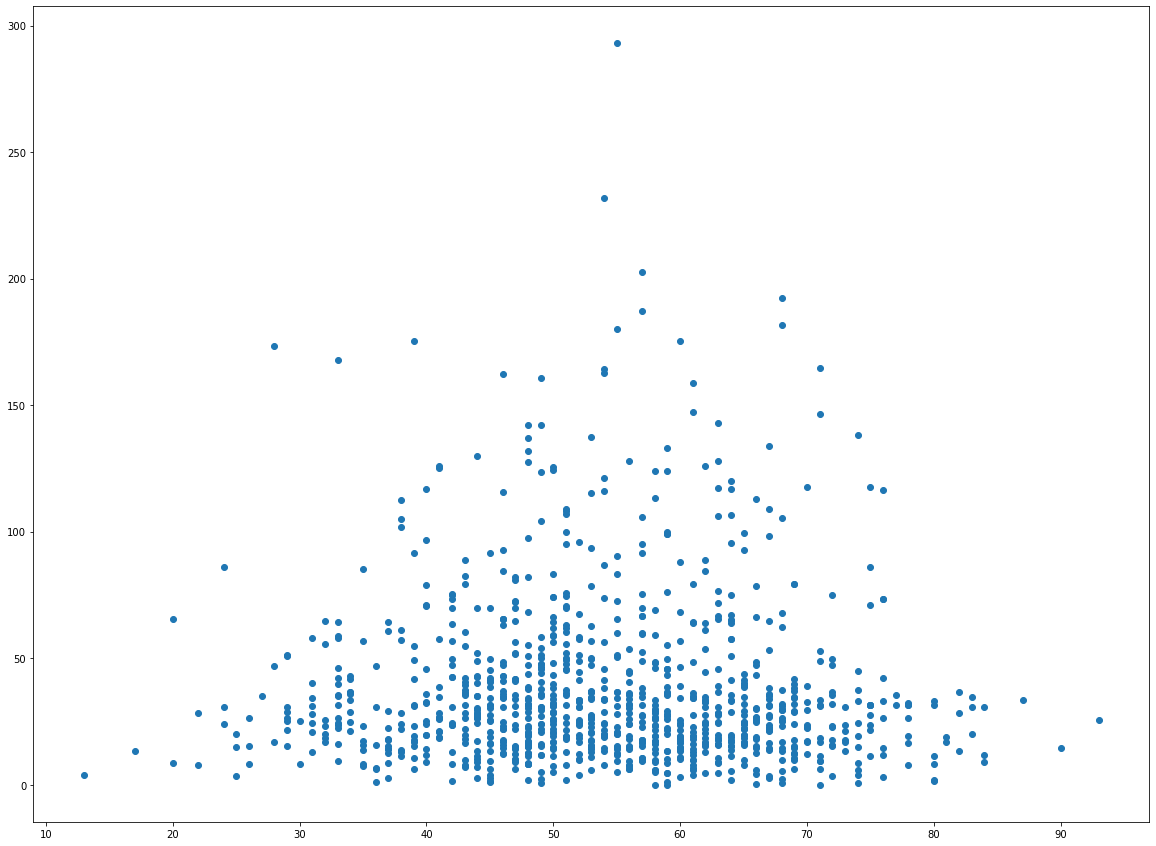

In [8]:
xValues = np.array(resultUnchanged['AGE_AT_DIAGNOSIS'])[:, None]
yValues = np.array(resultUnchanged['OS_MONTHS'])
plt.figure(figsize=(20, 15))
plt.scatter(xValues, yValues)

In [9]:
Males = resultUnchanged[resultUnchanged['SEX'] == 'Male']
Females = resultUnchanged[resultUnchanged['SEX'] == 'Female']

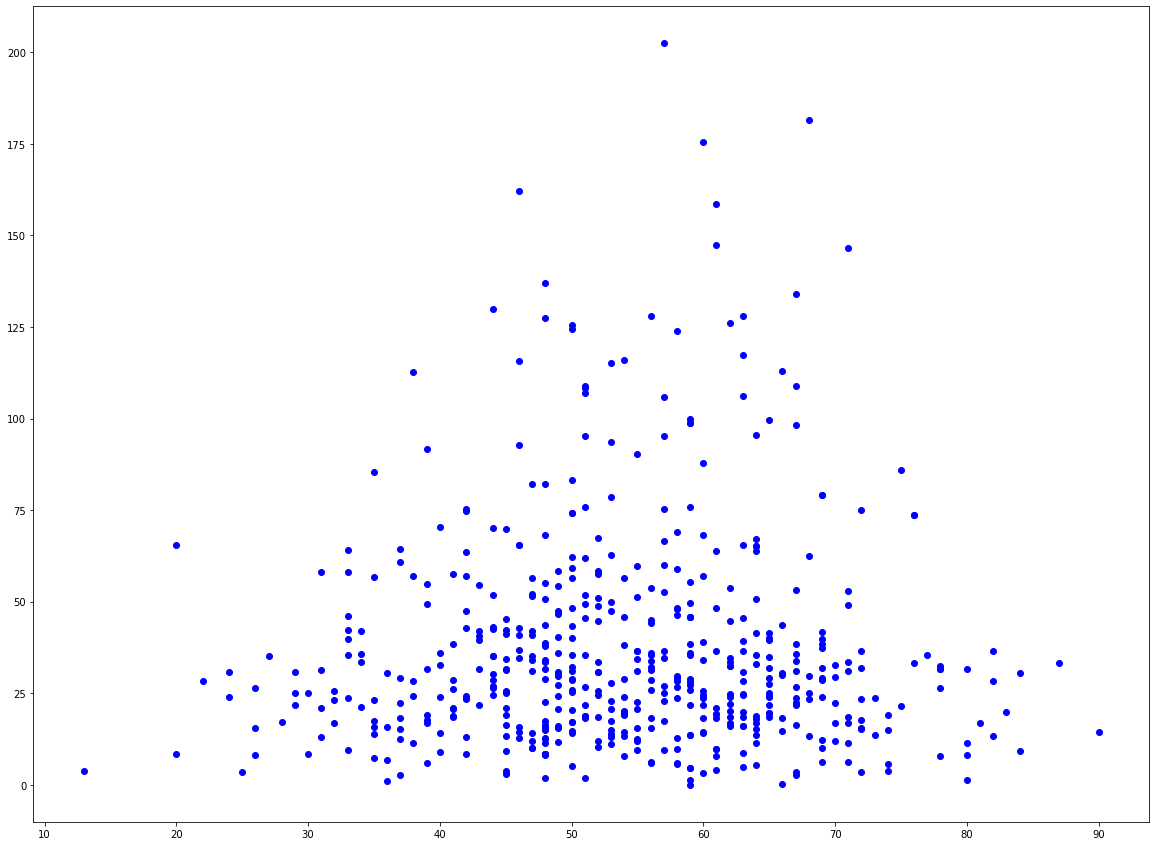

In [10]:
xValuesMales = np.array(Males['AGE_AT_DIAGNOSIS'])[:, None]
yValuesMales = np.array(Males['OS_MONTHS'])

xValuesFemales = np.array(Females['AGE_AT_DIAGNOSIS'])[:, None]
yValuesFemales = np.array(Females['OS_MONTHS'])


plt.figure(figsize=(20, 15))
plt.scatter(xValuesMales, yValuesMales, label = 'Male', color = 'blue')
#plt.scatter(xValuesFemales, yValuesFemales, label = 'Female', color = 'red')

In [11]:
DeceasedMales = resultUnchanged[(resultUnchanged['SEX'] == 'Male') & (resultUnchanged['VITAL_STATUS'] == 'Deceased')]
LivingMales = resultUnchanged[(resultUnchanged['SEX'] == 'Male') & (resultUnchanged['VITAL_STATUS'] == 'Living')]

DeceasedFemales = resultUnchanged[(resultUnchanged['SEX'] == 'Female') & (resultUnchanged['VITAL_STATUS'] == 'Deceased')]
LivingFemales = resultUnchanged[(resultUnchanged['SEX'] == 'Female') & (resultUnchanged['VITAL_STATUS'] == 'Living')]

In [12]:
mssPatients = resultUnchanged[resultUnchanged['MSI_STATUS'] == 'MSS']
msiPatients = resultUnchanged[resultUnchanged['MSI_STATUS'] == 'MSI']

In [13]:
xValuesmssPatients = np.array(mssPatients['AGE_AT_DIAGNOSIS'])[:, None]
yValuesmssPatients = np.array(mssPatients['OS_MONTHS'])

xValuesmsiPatients = np.array(msiPatients['AGE_AT_DIAGNOSIS'])[:, None]
yValuesmsiPatients = np.array(msiPatients['OS_MONTHS'])

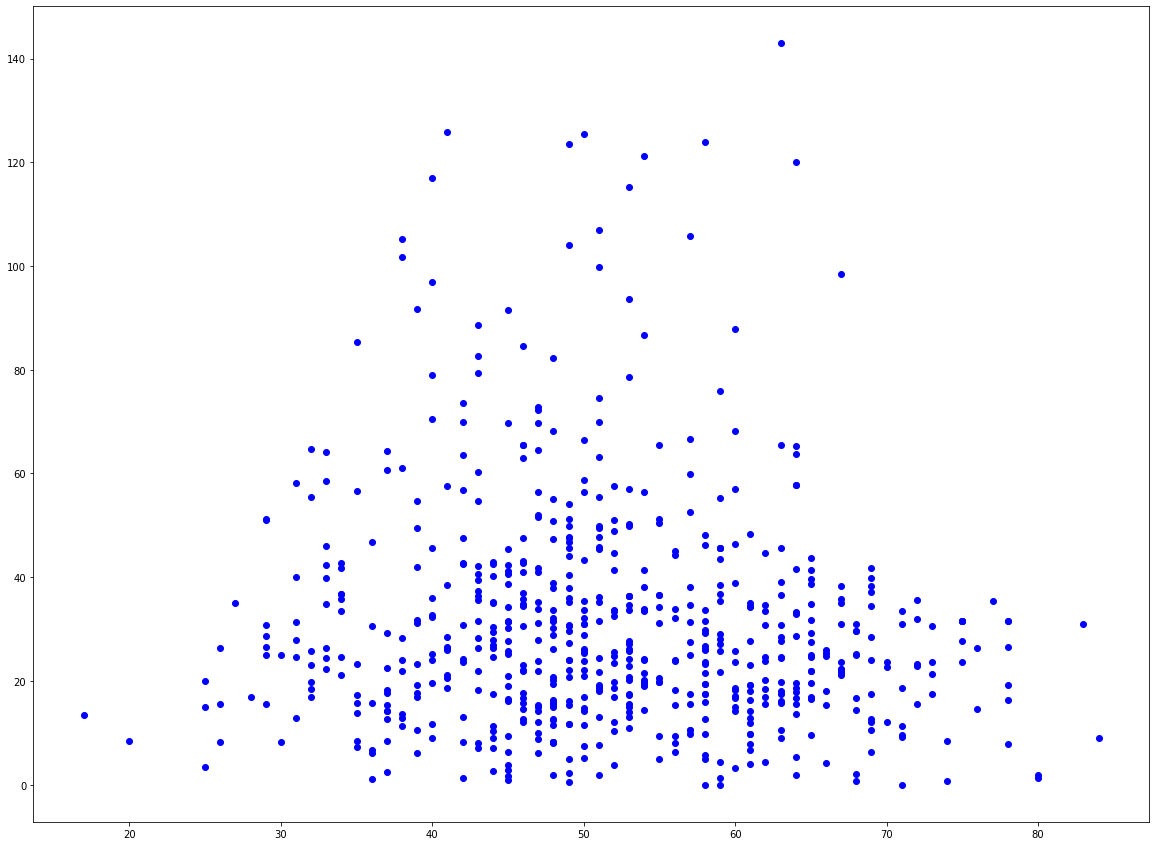

In [16]:
plt.figure(figsize=(20, 15))
plt.scatter(xValuesmssPatients, yValuesmssPatients, label = 'MSS', color = 'blue')
#plt.scatter(xValuesmsiPatients, yValuesmsiPatients, label = 'MSI', color = 'red')

In [40]:
#result.to_csv('NewlyUpdated.csv')

In [ ]:
result.to_excel(r'TestFileMoffitt.xlsx', index=False)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

In [ ]:
Xtrain =np.array(resultUnchanged['x'])[:, None]
y = np.array(resultUnchanged['y'])

In [ ]:
model.fit(Xtrain, y)

In [21]:
#Patient Identifier	Sample Identifier	Chemo Exposure of sequenced specimen	Tumor Sample Histology	MSI Status	Oncotree Code	Sample Type	Primary Tumor Site	Metastatic Biopsy Site	Primary Tumor Location	Gene Panel	Stage At Diagnosis	Molecular Subtype	MSI Score	mCRC Type	Specimen Type	Metastasectomy	Metastasectomy Site	TIme to Metastasis Months	Time from Met Dx to Sequencing	First Site of Metastasis	Metastases Site First: Liver	Metastases Site First: Ln	Metastases Site First: Lung	Metastases Site First: Pelvis	Metastases Site First: Brain	Metastases Site First: Bone	Metastases Site First: Peritoneum, omentum, abdomen	Metastases Site First: Gynecological	Other Metastasis Sites	Cancer Type	Cancer Type Detailed	Somatic Status	TMB (nonsynonymous)
#Identifier to uniquely specify a patient.	A unique sample identifier.	Chemo Exposure of sequenced specimen	Tumor Sample Histology	MSI status.	Oncotree Code	The type of sample (i.e., normal, primary, met, recurrence).	Text term to describe the organ sub-division in an individual with cancer.	Metastatic Biopsy Site	Primary Tumor Location	Gene panel.	Stage At Diagnosis	Molecular subtype.	MSI Score	mCRC Type	The broad cancer phenotype and site information values for a sample to be processed.	Metastasectomy	Metastasectomy Site	TIme to Metastasis Months	Time from Met Dx to Sequencing	First Site of Metastasis	Metastases Site First: Liver	Metastases Site First: Ln	Metastases Site First: Lung	Metastases Site First: Pelvis	Metastases Site First: Brain	Metastases Site First: Bone	Metastases Site First: Peritoneum, omentum, abdomen	Metastases Site First: Gynecological	Other Metastasis Sites Description	Cancer Type	Cancer Type Detailed	Somatic Status	TMB (nonsynonymous)
#STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	NUMBER	STRING	STRING	STRING	STRING	NUMBER	NUMBER	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	NUMBER
#1	1	1	1	1	1	9	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1

dataCnaDF = pd.read_csv("Moffitt_Test_Data/data_cna.txt",delimiter="\t")

In [22]:
dataCnaDF.to_excel(r'dataCnaDF.xlsx', index=False)
dataCnaDF.to_csv(r'dataCnaDF.csv', index=False)

In [23]:
dataCnaDF

,Hugo_Symbol,P-0006287-T01-IM5,P-0004652-T01-IM5,P-0002852-T01-IM3,P-0009139-T01-IM5,P-0006822-T01-IM5,P-0000682-T01-IM3,P-0011110-T01-IM5,P-0010207-T01-IM5,P-0003886-T01-IM5,...,P-0008226-T02-IM5,P-0004736-T01-IM5,P-0010425-T01-IM5,P-0012389-T01-IM5,P-0009842-T01-IM5,P-0010966-T01-IM5,P-0009433-T01-IM5,P-0006763-T01-IM5,P-0000635-T01-IM3,P-0001525-T01-IM3
0,RB1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,MDC1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,ARAF,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,PREX2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,SOX17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,ERCC2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
470,HIST3H3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
471,ERCC5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
472,KRAS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [13]:
#Patient Identifier	Sample Identifier	Chemo Exposure of sequenced specimen	Tumor Sample Histology	MSI Status	Oncotree Code	Sample Type	Primary Tumor Site	Metastatic Biopsy Site	Primary Tumor Location	Gene Panel	Stage At Diagnosis	Molecular Subtype	MSI Score	mCRC Type	Specimen Type	Metastasectomy	Metastasectomy Site	TIme to Metastasis Months	Time from Met Dx to Sequencing	First Site of Metastasis	Metastases Site First: Liver	Metastases Site First: Ln	Metastases Site First: Lung	Metastases Site First: Pelvis	Metastases Site First: Brain	Metastases Site First: Bone	Metastases Site First: Peritoneum, omentum, abdomen	Metastases Site First: Gynecological	Other Metastasis Sites	Cancer Type	Cancer Type Detailed	Somatic Status	TMB (nonsynonymous)
#Identifier to uniquely specify a patient.	A unique sample identifier.	Chemo Exposure of sequenced specimen	Tumor Sample Histology	MSI status.	Oncotree Code	The type of sample (i.e., normal, primary, met, recurrence).	Text term to describe the organ sub-division in an individual with cancer.	Metastatic Biopsy Site	Primary Tumor Location	Gene panel.	Stage At Diagnosis	Molecular subtype.	MSI Score	mCRC Type	The broad cancer phenotype and site information values for a sample to be processed.	Metastasectomy	Metastasectomy Site	TIme to Metastasis Months	Time from Met Dx to Sequencing	First Site of Metastasis	Metastases Site First: Liver	Metastases Site First: Ln	Metastases Site First: Lung	Metastases Site First: Pelvis	Metastases Site First: Brain	Metastases Site First: Bone	Metastases Site First: Peritoneum, omentum, abdomen	Metastases Site First: Gynecological	Other Metastasis Sites Description	Cancer Type	Cancer Type Detailed	Somatic Status	TMB (nonsynonymous)
#STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	NUMBER	STRING	STRING	STRING	STRING	NUMBER	NUMBER	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	STRING	NUMBER
#1	1	1	1	1	1	9	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1	1

dataGenePanelMatrixDF = pd.read_csv("Moffitt_Test_Data/data_gene_panel_matrix.txt",delimiter="\t")

In [17]:
dataGenePanelMatrixDF.to_excel(r'dataGenePanelMatrixDF.xlsx', index=False)
dataGenePanelMatrixDF

,SAMPLE_ID,mutations,structural_variants
0,P-0000119-T01-IM3,IMPACT341,IMPACT341
1,P-0000241-T01-IM3,IMPACT341,IMPACT341
2,P-0000493-T01-IM3,IMPACT341,IMPACT341
3,P-0000511-T01-IM3,IMPACT341,IMPACT341
4,P-0000520-T01-IM3,IMPACT341,IMPACT341
...,...,...,...
1129,P-0014252-T01-IM6,IMPACT468,IMPACT468
1130,P-0014258-T01-IM6,IMPACT468,IMPACT468
1131,P-0014296-T01-IM6,IMPACT468,IMPACT468
1132,P-0014404-T01-IM6,IMPACT468,IMPACT468


In [15]:
mutationsDF = pd.read_csv("Moffitt_Test_Data/data_mutations.txt",delimiter="\t")

In [20]:
mutationsDF.to_excel(r'mutationsDF.xlsx', index=False)
mutationsDF.to_csv(r'mutationsDF.csv', index=False)

In [12]:
svDFUnedited = pd.read_csv("Moffitt_Test_Data/data_sv.txt",delimiter="\t")
svDF = pd.read_csv("Moffitt_Test_Data/data_sv.txt",delimiter="\t")
svDF[['Site1_Position']] = svDF[['Site1_Position']].fillna(value=-1)
svDF[['Site2_Position']] = svDF[['Site2_Position']].fillna(value=-1)

svDF[['Normal_Read_Count']] = svDF[['Normal_Read_Count']].fillna(value=-1)
svDF[['Normal_Variant_Count']] = svDF[['Normal_Variant_Count']].fillna(value=-1)
svDF[['Normal_Paired_End_Read_Count']] = svDF[['Normal_Paired_End_Read_Count']].fillna(value=-1)
svDF[['Normal_Split_Read_Count']] = svDF[['Normal_Split_Read_Count']].fillna(value=-1)
svDF[['SV_Length']] = svDF[['SV_Length']].fillna(value=-1)
svDF[['SV_VariantId']] = svDF[['SV_VariantId']].fillna(value=-1)
svDF[['SV_Length']] = svDF[['SV_Length']].fillna(value=-1)
svDF[['Tumor_Read_Count']] = svDF[['Tumor_Read_Count']].fillna(value=-1)
svDF[['Tumor_Variant_Count']] = svDF[['Tumor_Variant_Count']].fillna(value=-1)

In [11]:
svDF.to_excel(r'svDF.xlsx', index=False)

In [ ]:
#left_aligned_df = svDF.style.set_properties(**{'text-align': 'left'})
#display(left_aligned_df)

In [10]:
svDF.to_csv(r'svDF.csv', index=False)

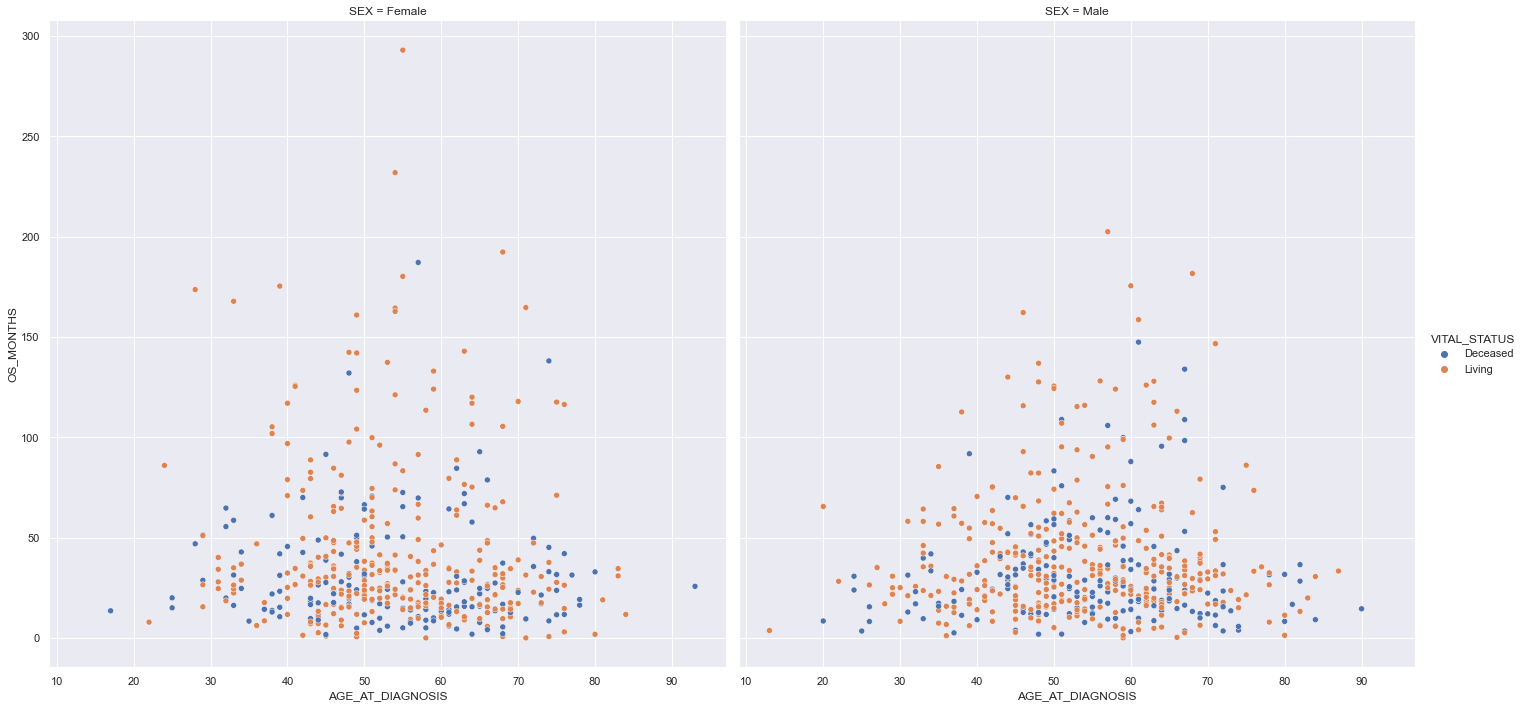

In [24]:
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Create a visualization
sns.relplot(
    data=resultUnchanged,
    x="AGE_AT_DIAGNOSIS", y="OS_MONTHS", col="SEX",
    hue="VITAL_STATUS", height=10, aspect=1/1
)


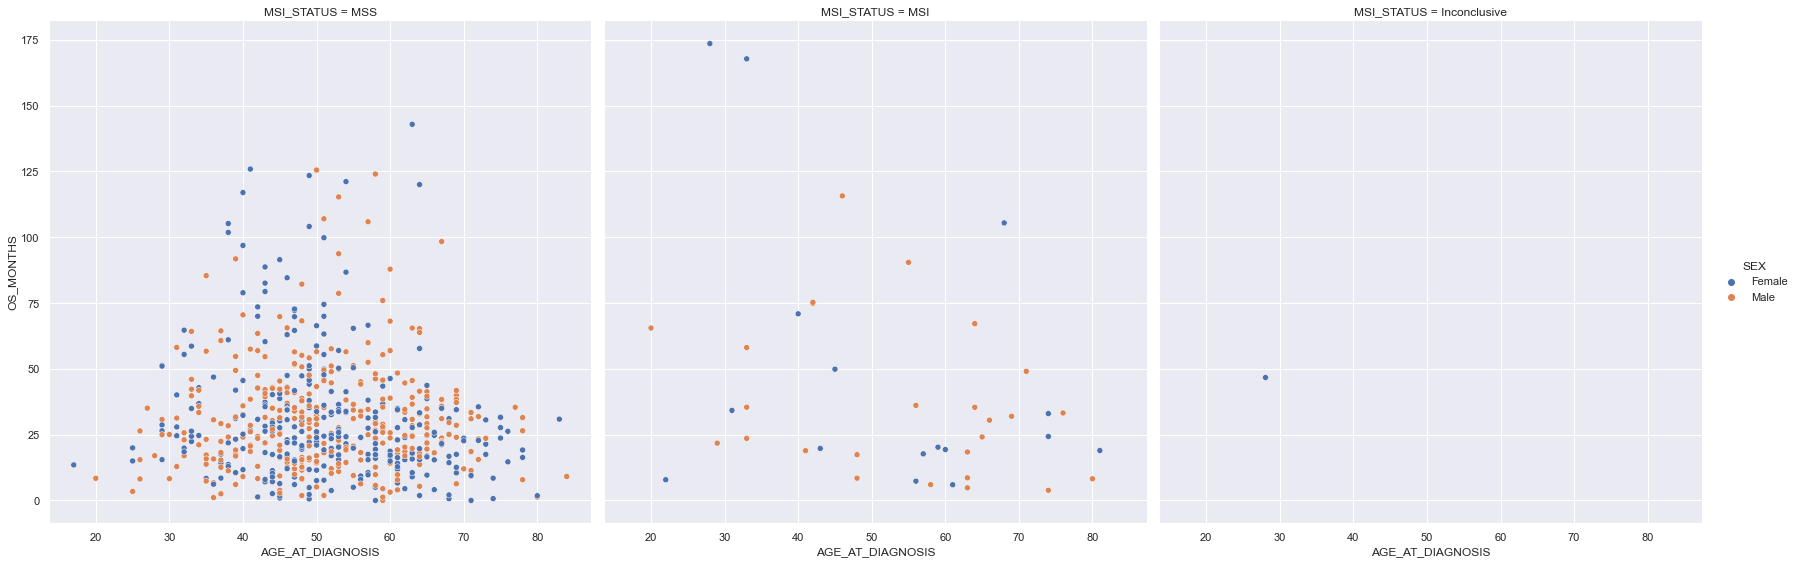

In [28]:
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Create a visualization
sns.relplot(
    data=resultUnchanged,
    x="AGE_AT_DIAGNOSIS", y="OS_MONTHS", col="MSI_STATUS",
    hue="SEX", height=8, aspect=1/1
)

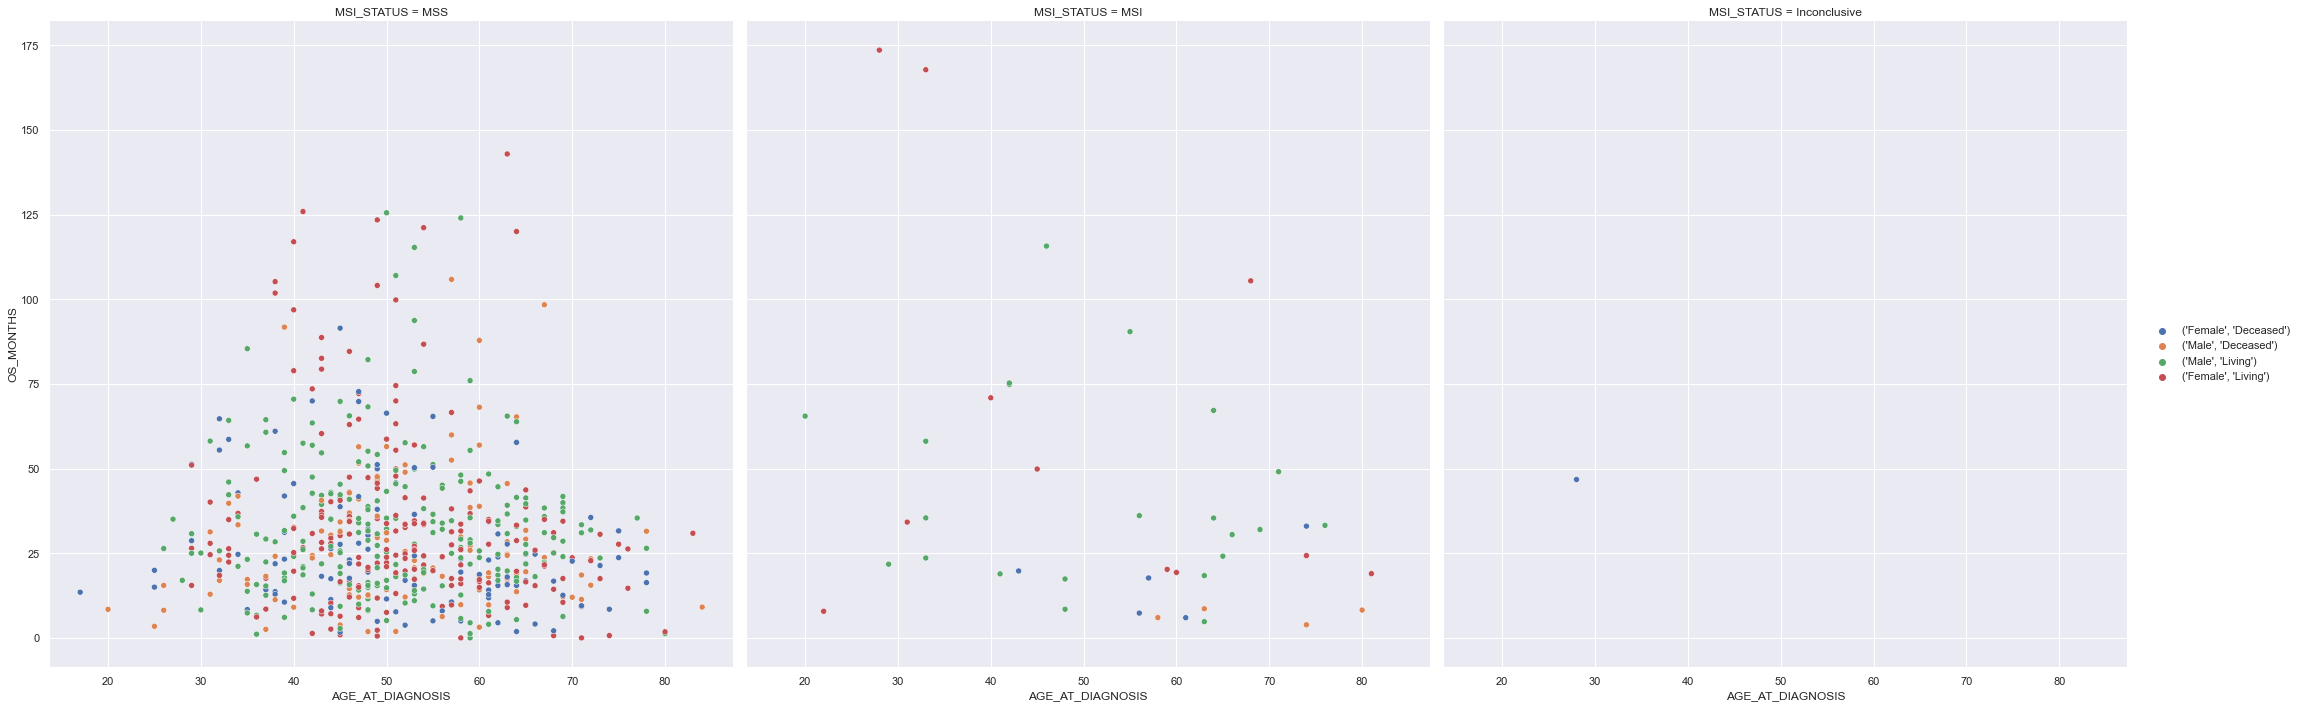

In [34]:
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Create a visualization
sns.relplot(
    data=resultUnchanged,
    x="AGE_AT_DIAGNOSIS", y="OS_MONTHS", col="MSI_STATUS",
    hue=resultUnchanged[['SEX', 'VITAL_STATUS']].apply(tuple, axis=1), height=10, aspect=1/1
)

,SEX,MSI_STATUS,VITAL_STATUS
0,Female,Unknown,Deceased
1,Female,MSS,Deceased
2,Male,Unknown,Deceased
3,Female,MSS,Deceased
4,Male,MSS,Living
...,...,...,...
1129,Male,MSS,Living
1130,Male,Unknown,Deceased
1131,Female,MSS,Living
1132,Female,MSI,Living


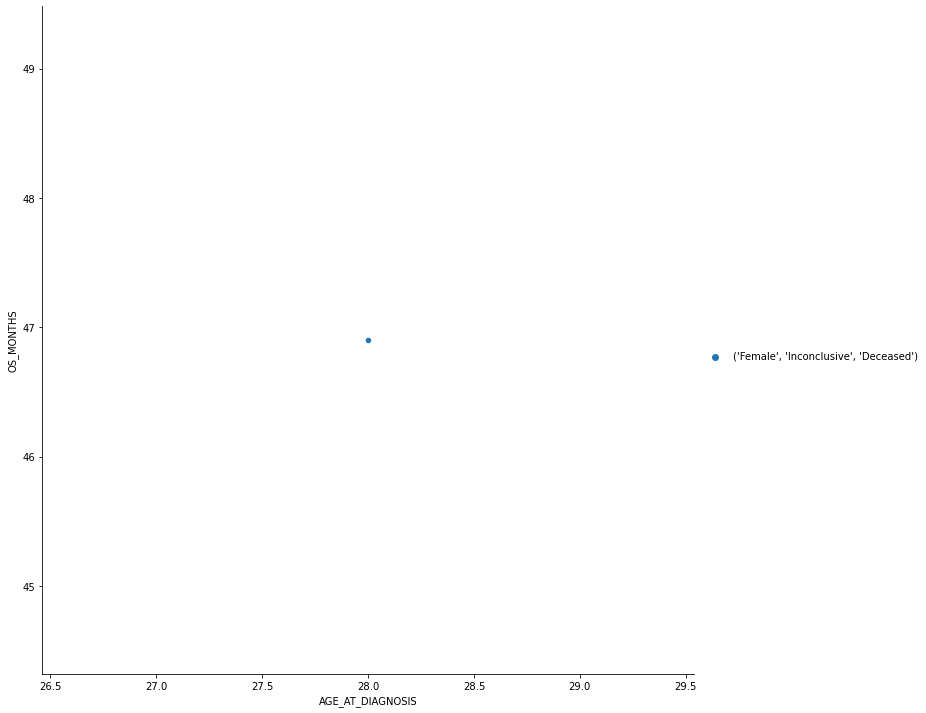

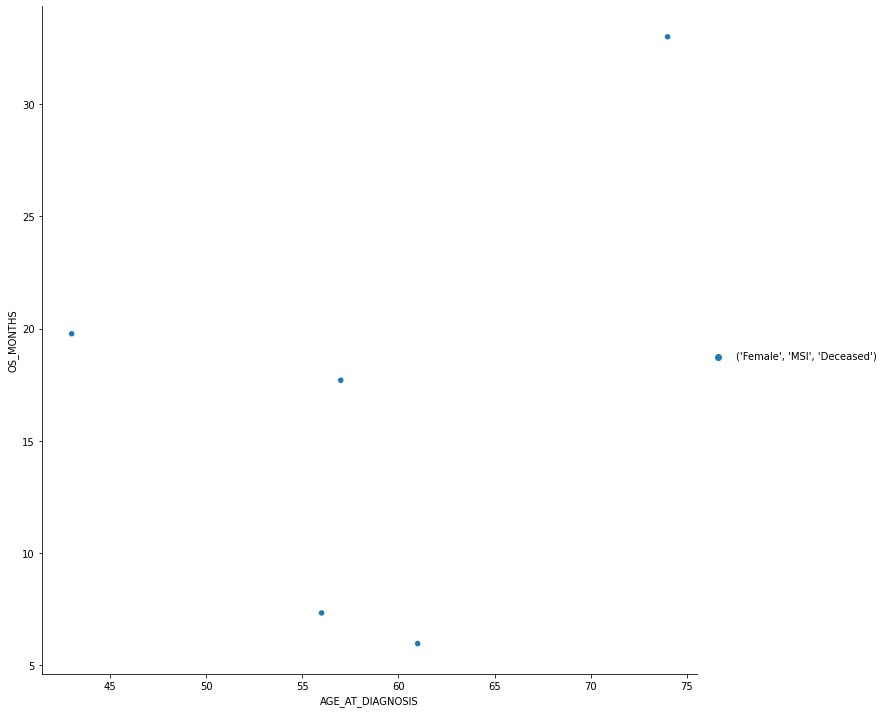

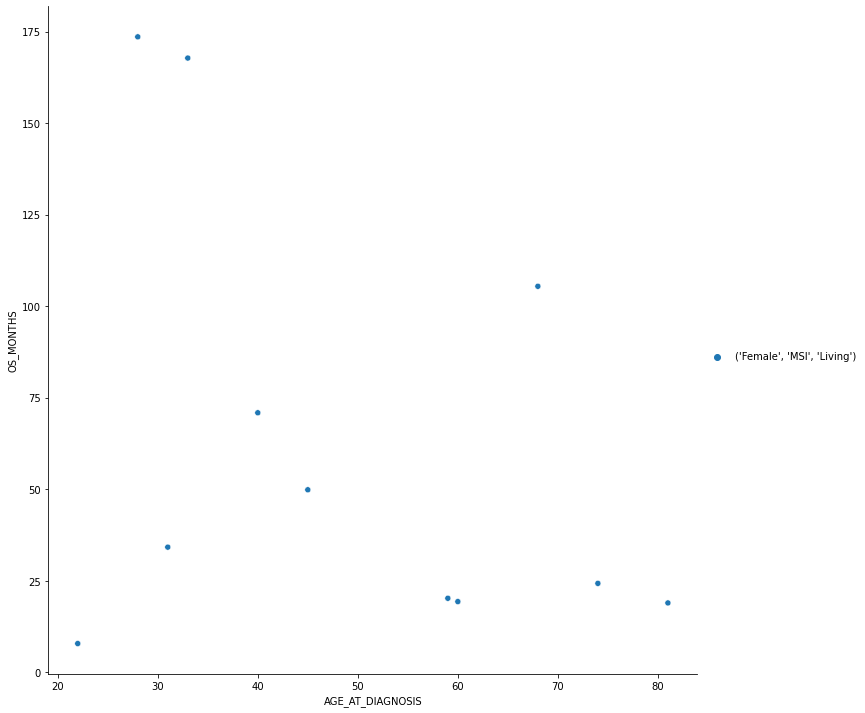

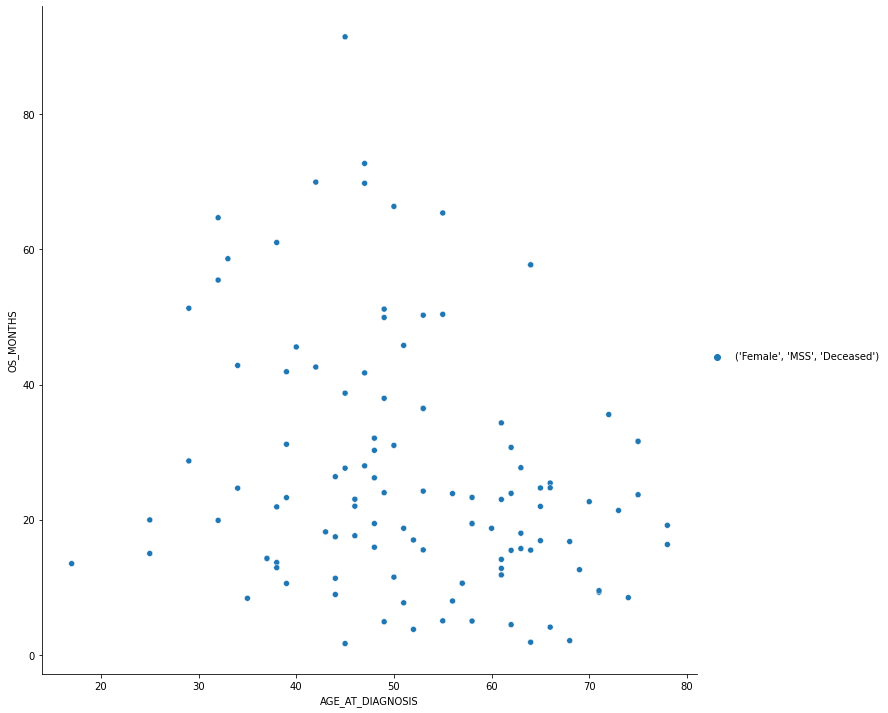

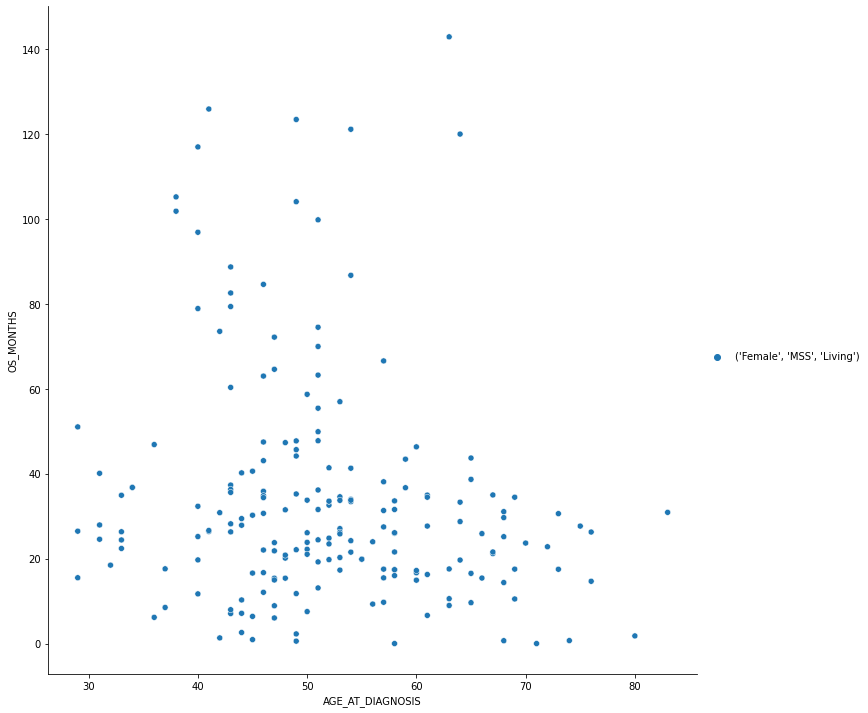

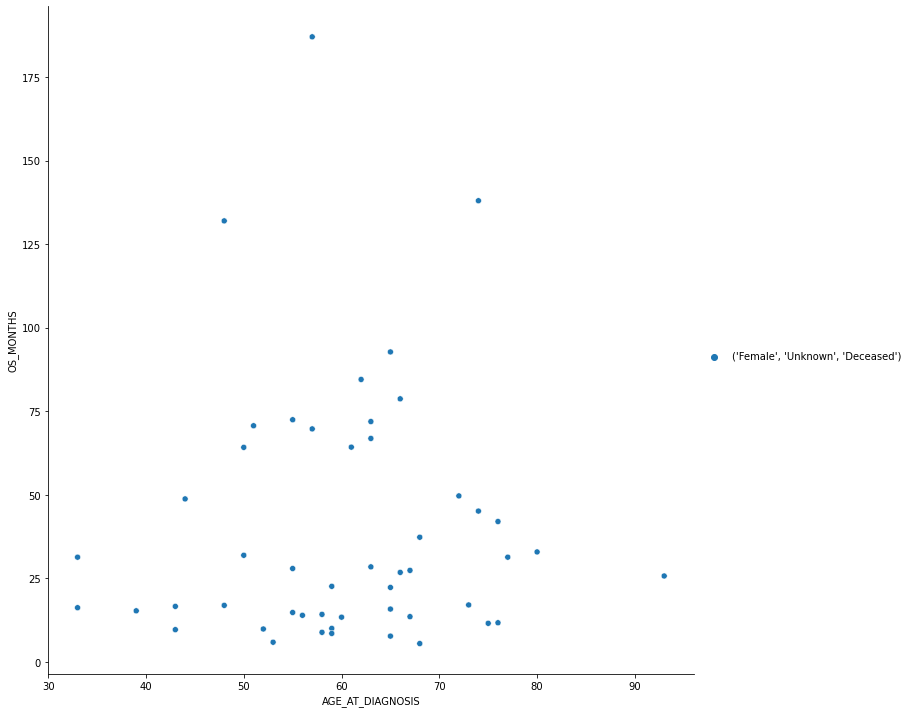

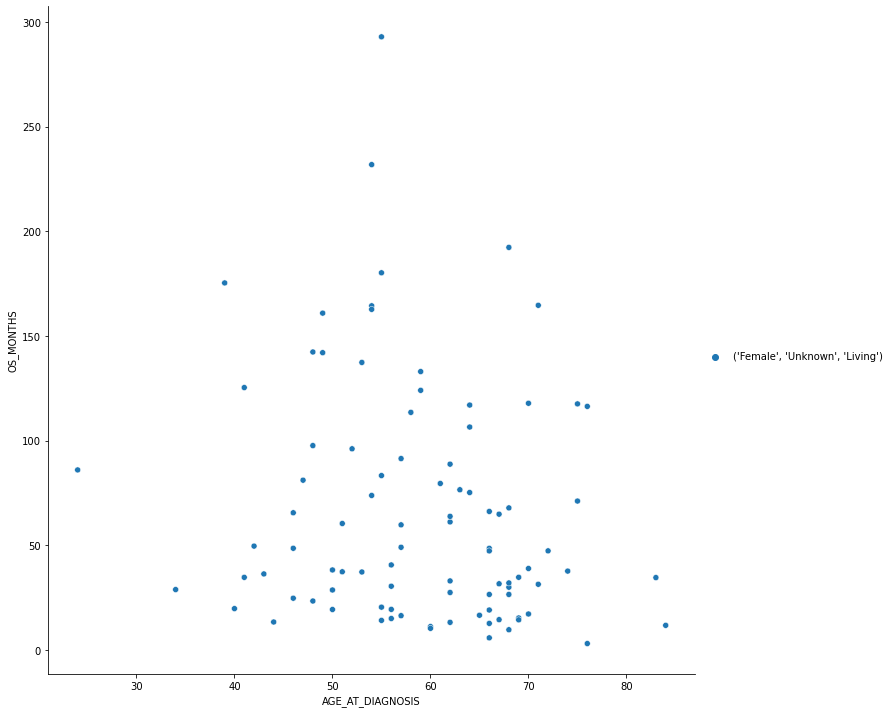

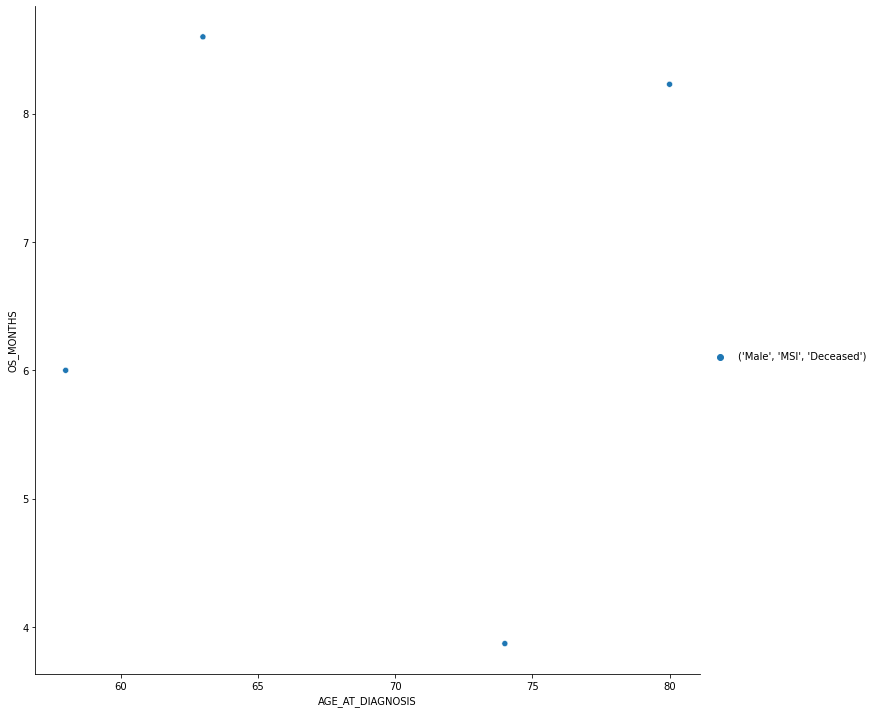

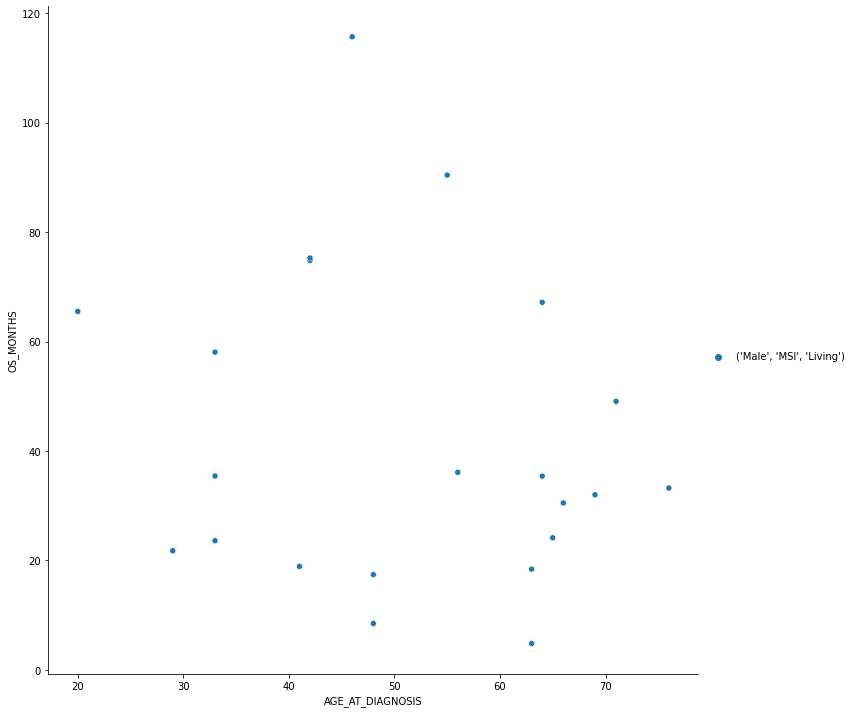

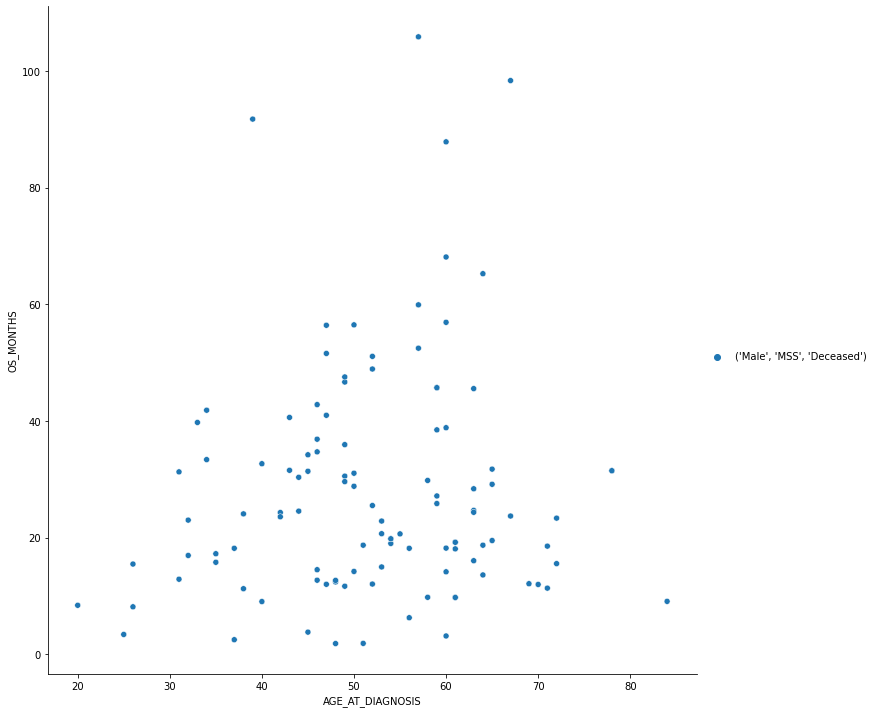

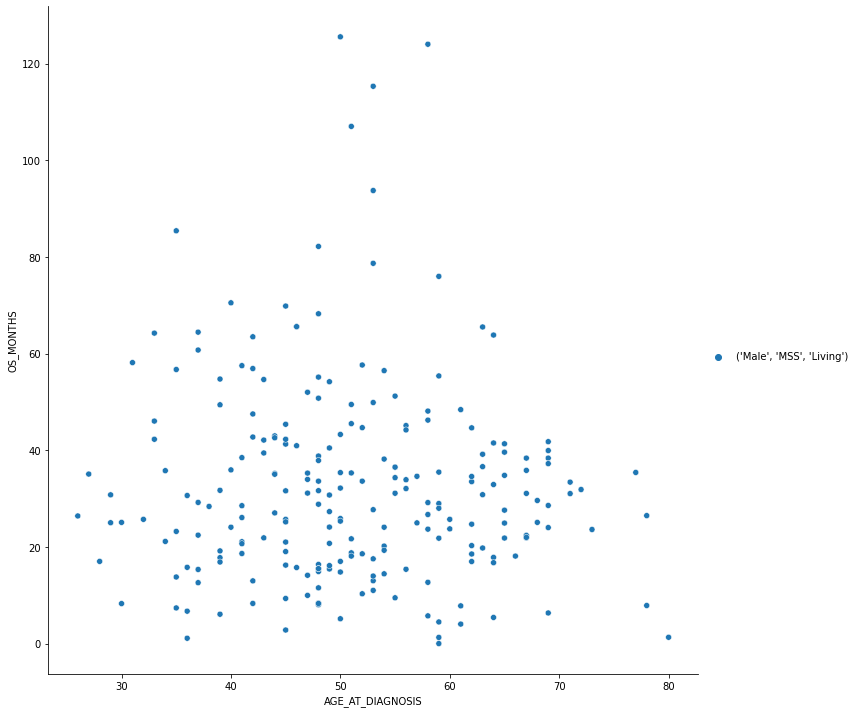

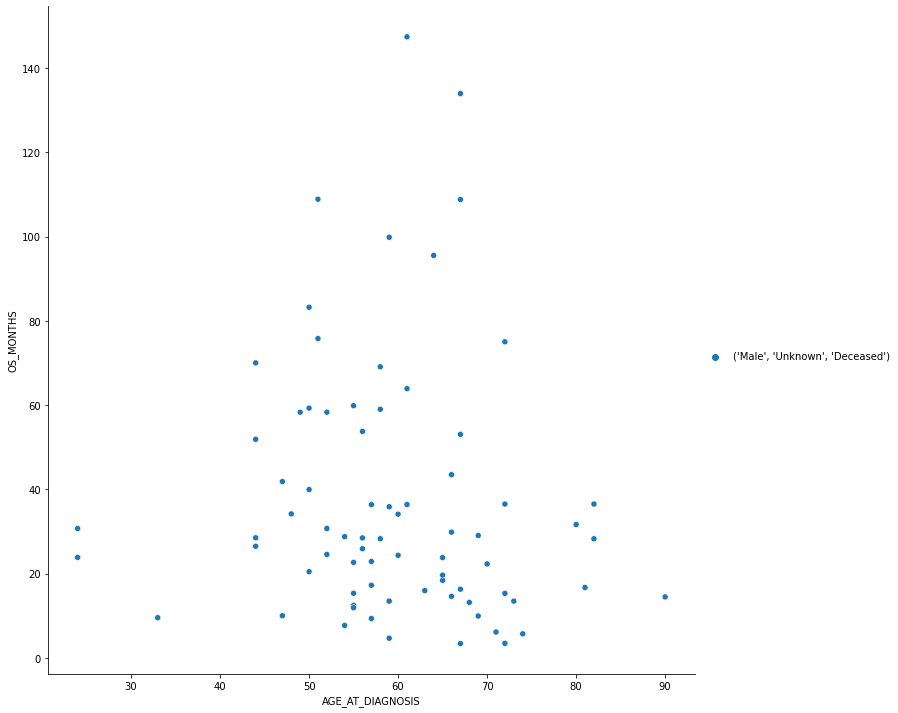

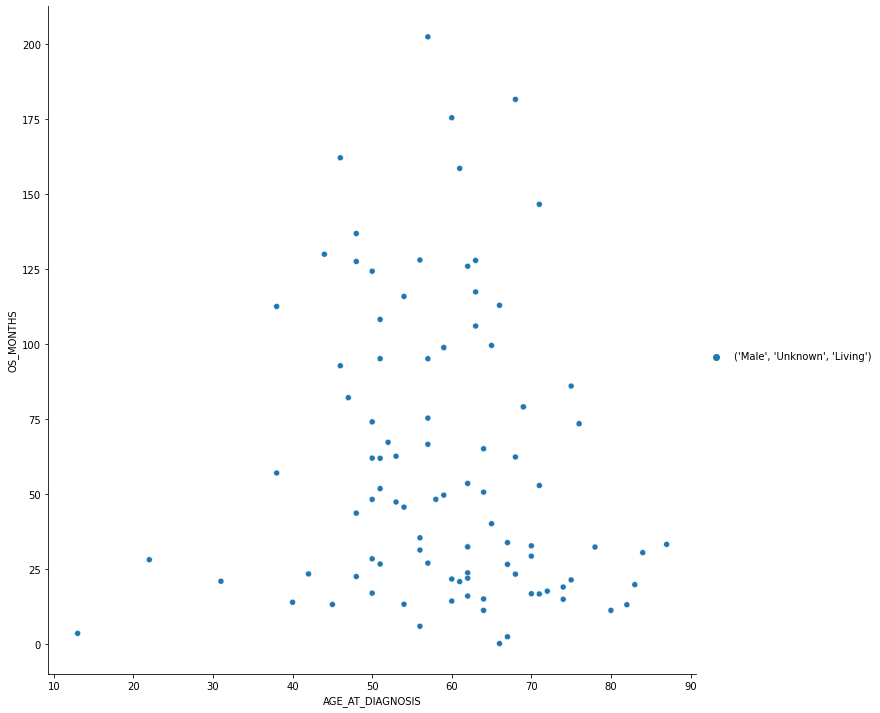

In [44]:
currentValues = ['SEX', "MSI_STATUS", 'VITAL_STATUS']
grouped = resultUnchanged.groupby(currentValues)

data = []
value = 0

arrayForm = resultUnchanged[currentValues]
display(arrayForm)

allCombos = list(arrayForm.groupby(currentValues).groups)

for i in allCombos:
    #temporary = np.array_str(i)
    #temporary = temporary[2:(len(temporary)-2)]
    df = grouped.get_group(i)
    #display(df)
    value += 1
    sns.relplot(
        data=df,
        x="AGE_AT_DIAGNOSIS", y="OS_MONTHS",
        hue=df[['SEX', 'MSI_STATUS', 'VITAL_STATUS']].apply(tuple, axis=1), height=10, aspect=1/1
    )

In [3]:
usableCNAdf = pd.read_csv("dataCnaDFFlipped.csv")

In [4]:
usableCNAdf

,Sample_Id,RB1,MDC1,ARAF,PREX2,SOX17,PPP4R2,MYC,AKT2,AKT3,...,TSHR,ERCC3,ERCC4,CARM1,RPS6KB2,ERCC2,HIST3H3,ERCC5,KRAS,TEK
0,P-0006287-T01-IM5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,P-0004652-T01-IM5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,P-0002852-T01-IM3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,P-0009139-T01-IM5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,P-0006822-T01-IM5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,P-0010966-T01-IM5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1130,P-0009433-T01-IM5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1131,P-0006763-T01-IM5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1132,P-0000635-T01-IM3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
currentValues = ['SEX', "MSI_STATUS", 'VITAL_STATUS']
grouped = resultUnchanged.groupby(currentValues)

data = []
value = 0

arrayForm = resultUnchanged[currentValues]
display(arrayForm)

allCombos = list(arrayForm.groupby(currentValues).groups)

for i in allCombos:
    #temporary = np.array_str(i)
    #temporary = temporary[2:(len(temporary)-2)]
    df = grouped.get_group(i)
    #display(df)
    value += 1
    #df = df[['AGE_AT_DIAGNOSIS', 'OS_MONTHS', 'SEX', "MSI_STATUS", 'VITAL_STATUS']]
    
    fig = px.scatter(df, x="AGE_AT_DIAGNOSIS", y="OS_MONTHS", color = df[['SEX', 'MSI_STATUS', 'VITAL_STATUS']].apply(tuple, axis=1), hover_data=["PATIENT_ID", "SAMPLE_ID"])
    website = 'data' + str(value) + '.html'
    fig.write_html(website, auto_open=True)

,SEX,MSI_STATUS,VITAL_STATUS
0,Female,Unknown,Deceased
1,Female,MSS,Deceased
2,Male,Unknown,Deceased
3,Female,MSS,Deceased
4,Male,MSS,Living
...,...,...,...
1129,Male,MSS,Living
1130,Male,Unknown,Deceased
1131,Female,MSS,Living
1132,Female,MSI,Living
